# 本次目標：預測患者是否為肝臟疾病

# 數據包含：
患者的年齡

患者的性別

總膽紅素

直接膽紅素

鹼性磷酸酶

三聚氰胺氨基轉移酶

天冬氨酸氨基轉移酶

總勳章

白蛋白

白蛋白和球蛋白比率


## 目標欄位：


* 數據集Dataset：用於將數據分成兩組（患有肝病或無疾病的患者）的字段

* 有肝臟疾病為1 沒有肝臟疾病為2 



### 該數據集包含416份記錄和167份從印度安得拉邦東北部收集的非肝病患者記錄。 
### “數據集”列是用於將組分為肝病（肝病）或不分組（無疾病）的類別標籤。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("indian_liver_patient.csv") #讀取CSV檔
df.head()

c:\users\user\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

## 查看目標 : << Dataset>> 佔資料的比例有多少
## 以圖表呈現

Dataset欄位的資料型態為<class 'numpy.int64'>


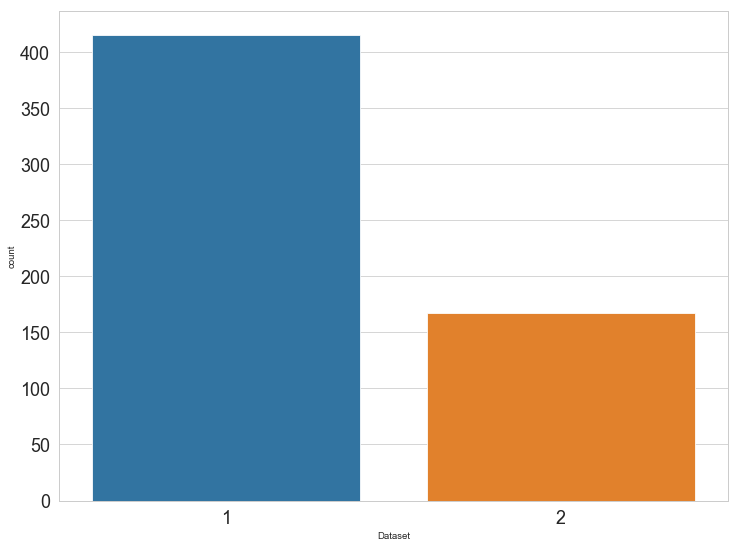

In [3]:
df['Dataset'].value_counts

name = 'Dataset'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

## 檢查資料缺失情況,以百分比

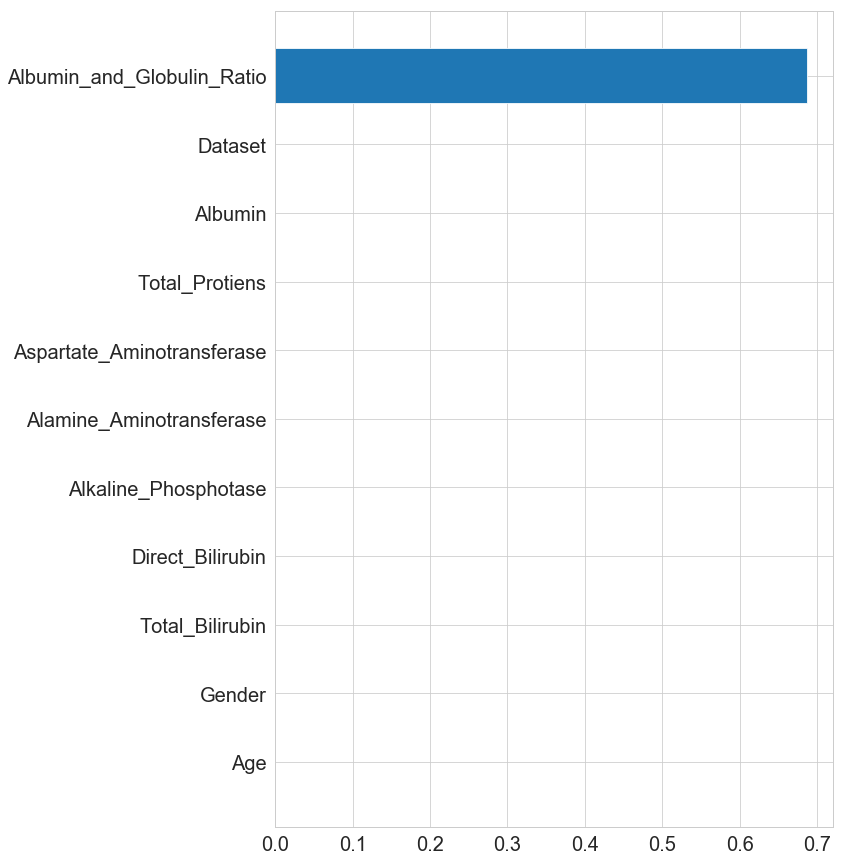

In [4]:
plt.figure(figsize=(10,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

## drop 缺失值

In [5]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

## 檢查是否還有缺失值
df.isnull().sum(axis=0)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## One hot encoding

In [6]:
df2 = pd.get_dummies(df)


In [9]:
df2.head().T

0       1       2      3      4
Age                          65.0   62.00   62.00   58.0   72.0
Total_Bilirubin               0.7   10.90    7.30    1.0    3.9
Direct_Bilirubin              0.1    5.50    4.10    0.4    2.0
Alkaline_Phosphotase        187.0  699.00  490.00  182.0  195.0
Alamine_Aminotransferase     16.0   64.00   60.00   14.0   27.0
Aspartate_Aminotransferase   18.0  100.00   68.00   20.0   59.0
Total_Protiens                6.8    7.50    7.00    6.8    7.3
Albumin                       3.3    3.20    3.30    3.4    2.4
Albumin_and_Globulin_Ratio    0.9    0.74    0.89    1.0    0.4
Dataset                       1.0    1.00    1.00    1.0    1.0
Gender_Female                 1.0    0.00    0.00    0.0    0.0
Gender_Male                   0.0    1.00    1.00    1.0    1.0

## 資料處理完成,使用PCA 將資料降維,Kmeans分群

## kmeans簡介

### 把所有資料點分成 k 個 cluster，使得相同 cluster 中的所有資料點彼此儘量相似，而不同 cluster 的資料點儘量不同。

![title](1.png)

### 對每一個 training example 根據它距離哪一個 cluster centroid 較近，標記爲其中之一 (cluster assignment)

![title](2.png)

## PCA主成分分析簡介：

### PCA 透過計算 eigen value, eigen vector, 可以將原本的 features 降維至特定的維度

## 為何資料需要降低維度?
1. 特徵組合及抽象化

    將高度相關的特徵做合併,觀察合併後的特徵對資料重要性

![title](3.png)

2. 資料視覺化

    把多維資料降至2維,配合其他分類,觀看資料分布

![title](4.png)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA
%matplotlib inline

## 將12維特徵資料轉為4維

* 標準化
* 求共變異數矩陣(Covariance Matrix)
* 矩陣分解成特徵向量(eigenvector) 和特徵值(eigenvalue)
* 選取最大的p個eigenvalues和對應的eigenvectors
* 合併p個eigenvector成為(投影矩陣)
* X.dot(W) 即為新的X'矩陣

## 對於程式來說 sklearn已經有套件可以算好複雜的數學式

In [13]:
X = df2
pca = decomposition.PCA(n_components=4) 
# PCA算法中所要保留的主成分個數n，也即保留下來的特徵個數n

pca.fit(X)

X = pca.transform(X)

X
##將數據X轉換成降維後的數據。當模型訓練好後，對於新輸入的數據，都可以用transform方法來降維

array([[-134.52873456,  -73.49549924,   13.28912241,   20.27635157],
       [  82.24170123,  399.88605505,    1.89672571,   14.72424944],
       [   2.42721932,  204.20913906,   -6.29147641,   16.03110725],
       ...,
       [ -78.97386158,  -27.98289136,   -0.55954219,    7.31015738],
       [-117.19561633,  -81.22988205,    8.36480166,  -13.56039774],
       [-119.99015215,  -47.44352192,   10.84373638,   -6.85139903]])

## 降維完成 觀看共變異數占比

In [14]:
pca.explained_variance_ratio_

array([0.62682256, 0.31652731, 0.05494304, 0.00145397])

In [15]:
## 畫百分比線
def accmulate(x):
    p = []
    for i in range(len(x)):
        if(i==0):
            p.append(x[i])
        else:
            p.append(p[i-1]+x[i])
    return p

### 由下圖可以看出第一個主成分佔60%變異數，第二個主成分約佔30%，合併約為90%

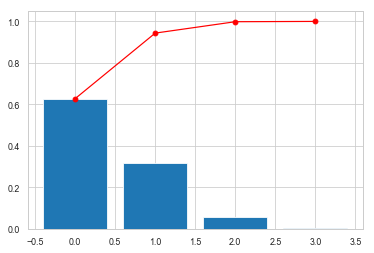

In [16]:
y1 = pca.explained_variance_ratio_
y2 = accmulate(pca.explained_variance_ratio_)
x = [i for i in range(len(y1))]

plt.figure()
plt.bar(x,y1,align='center')
plt.plot(x,y2,'r-o')

plt.show()

## 使用kmeans 將資料分群後 以PCA降成2維可視化 來觀看分群效果

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [26]:
X = df2

## 分成3群測試

In [32]:
clf = KMeans(n_clusters=3)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

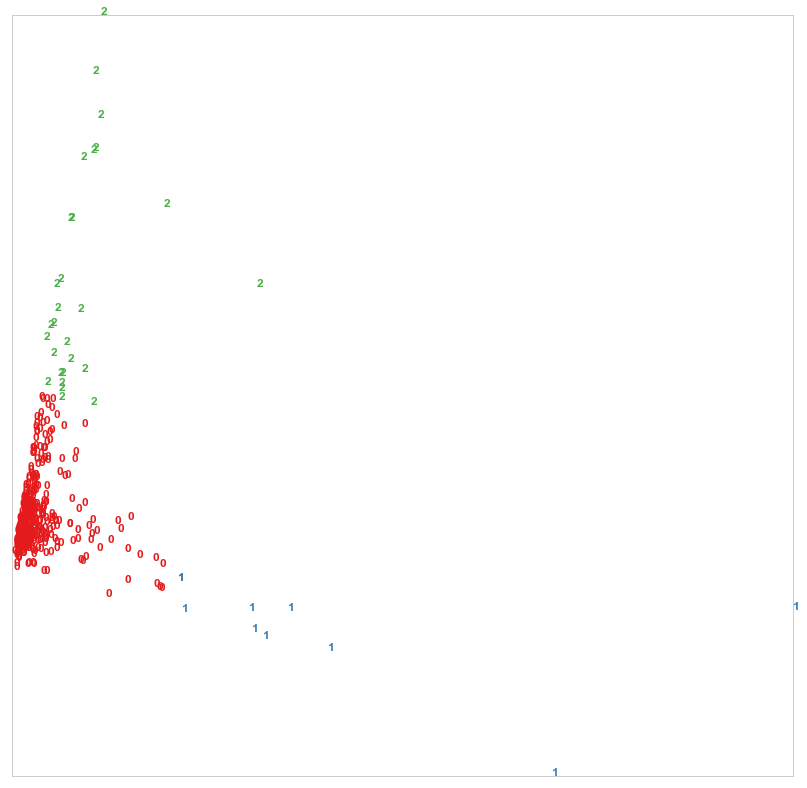

In [33]:
pca = PCA()
X_pca = pca.fit_transform(X)

y = clf.labels_ #將分好的群label畫在圖上
x_min, x_max = X_pca.min(0), X_pca.max(0)
X_norm = (X_pca - x_min) / (x_max - x_min)  # 標準化
plt.figure(figsize=(14, 14))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), #標點
             fontdict={'weight': 'bold', 'size': 12})
plt.xticks([])
plt.yticks([])
plt.show()